<a href="https://colab.research.google.com/github/vitorbeltrao/VB_data_science/blob/main/Projeto_de_machine_learning_Clusteriza%C3%A7%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clusterização de dados: Segmentação de clientes

Entender o seu negócio e como os clientes se relacionam com sua empresa e seu produto é fundamental para desenvolver a melhor estratégia.

**Um bom caminho a ser seguido nesse sentido é a clusterização**. Uma prática nascida no universo do marketing, a formação de clusters vai além da publicidade e impacta o resultado geral da organização.

<p align=center>
<img src="https://image.freepik.com/free-vector/audience-segmentation-abstract-concept-illustration_335657-1854.jpg" width="35%"></p>

Cluster são formações de grupos de pessoas, produtos, ações, etc, que tenham características semelhantes.

Por meio da clusterização, a empresa melhora o tipo de mensagem que envia ao público, como promoções de produtos com mais propensão de aquisição ou um serviço alinhado com a situação atual do cliente. Isso fortalece a relação e, consequentemente, incrementa os lucros.

<p align=center>
<img src="https://image.flaticon.com/icons/png/512/627/627416.png" width="15%"></p>

**Com um mercado mais segmentado, surge a necessidade por produtos e serviços mais customizados, criando assim novas demandas. A análise dos clientes por meio dos clusters ajuda a enxergar e tomar decisões melhores, aperfeiçoando toda a estratégia de atração e vendas.**

Por ser uma excelente estratégia de mercado, é que vamos, neste projeto, fazer uma clusterização de clientes para definir algum plano de ação para a empresa.

## Aquisição dos Dados

Os dados deste trabalho foram adquiridos do [Kaggle](https://www.kaggle.com/arjunbhasin2013/ccdata). Lá você encontra esse e outros datasets muito interessantes para fazer projetos como esse ou até participar de competições entre cientistas de dados.

**Informação das variáveis:**

**CUSTID** : Identificação do titular do cartão de crédito;

**BALANCE** : Saldo restante na conta para fazer compras;

**BALANCEFREQUENCY** : com que frequência o saldo é atualizado, pontuação entre 0 e 1 (1 = atualizado com frequência, 0 = não atualizado com frequência);

**PURCHASES** : Valor das compras realizadas;

**ONEOFFPURCHASES** : Valor máximo da compra realizada de uma só vez;

**INSTALLMENTSPURCHASES** : Valor da compra parcelada;

**CASHADVANCE** : Antecipado dado pelo usuário;

**PURCHASESFREQUENCY** : Frequência com que as compras estão sendo feitas, pontuação entre 0 e 1 (1 = frequentemente comprado, 0 = não frequentemente comprado);

**ONEOFFPURCHASESFREQUENCY** : Com que frequência as compras acontecem de uma vez (1 = frequentemente comprado, 0 = não frequentemente comprado);

**PURCHASESINSTALLMENTSFREQUENCY** : Frequência com que as compras a prazo estão sendo feitas (1 = frequentemente, 0 = não frequentemente);

**CASHADVANCEFREQUENCY** : Frequência com que o dinheiro antecipado está sendo pago;

**CASHADVANCETRX** : Número de transações feitas com "Dinheiro adiantado";

**PURCHASESTRX** : Número de transações de compras feitas;

**CREDITLIMIT** : Limite do cartão de crédito;

**PAYMENTS** : Valor do pagamento feito pelo usuário;

**MINIMUM_PAYMENTS** : Valor mínimo dos pagamentos feitos pelo usuário;

**PRCFULLPAYMENT** : Porcentagem do pagamento total pago pelo usuário;

**TENURE** : Posse do serviço de cartão de crédito para o usuário.

**OBJETIVO DO TRABALHO: Desenvolvimento de uma segmentação de clientes para definir a estratégia de marketing.**

In [ ]:
# Importar os pacotes necessários.
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("https://raw.githubusercontent.com/vitorbeltrao/Datasets/main/CC%20GENERAL.csv")

## Análise exploratória dos dados

Em primeiro lugar, vamos fazer uma análise exploratória bem sucinta desses dados para conseguirmos extrair informações valiosas que nos ajudará na criação e no melhor desempenho do nosso algoritmo de clusterização. 

**Para tornar a análise exploratória simples de entender vamos dividir as tarefas em tópicos e ir detalhando uma a uma.**

* Verificar as 05 primeiras entradas do dataset

In [ ]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


Note que apenas com esse comando, conseguimos ter uma visão geral do nosso dataset, identificando nossas variáveis (colunas) e nossas entradas (linhas) e assim já conseguindo obter alguns insights de como proceder com esse dataset.

* Verificar os tipos das variáveis e tamanho do dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

Esse dataset é composto por 18 variáveis e 8950 entradas.
Com exceção do ID do cliente, o restante das variáveis são todas numéricas.

* Verificar o resumo estatístico do dataframe

In [ ]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


Com esse método, conseguimos um resumo estatístico completo com as quantidades, média, desvio padrão, os quartis e valores máximos.

É muito importante termos essa visão estatística dos nossos dados para identificarmos possíveis outliers e analisar se as quantidades apresentadas fazem sentido no problema em questão.

* Verificar a porcentagem de valores ausentes nas colunas

In [ ]:
# Porcentagem de valores ausentes
df.isnull().sum() / df.shape[0]

CUST_ID                             0.000000
BALANCE                             0.000000
BALANCE_FREQUENCY                   0.000000
PURCHASES                           0.000000
ONEOFF_PURCHASES                    0.000000
INSTALLMENTS_PURCHASES              0.000000
CASH_ADVANCE                        0.000000
PURCHASES_FREQUENCY                 0.000000
ONEOFF_PURCHASES_FREQUENCY          0.000000
PURCHASES_INSTALLMENTS_FREQUENCY    0.000000
CASH_ADVANCE_FREQUENCY              0.000000
CASH_ADVANCE_TRX                    0.000000
PURCHASES_TRX                       0.000000
CREDIT_LIMIT                        0.000112
PAYMENTS                            0.000000
MINIMUM_PAYMENTS                    0.034972
PRC_FULL_PAYMENT                    0.000000
TENURE                              0.000000
dtype: float64

Esse dataset está bem completo, ou seja, ele possui poucos valores ausentes. Apenas duas variáveis, como podemos ver, possuem uma quantidade muito pequena de valores ausentes.

**Na próxima etapa do projeto, que é uma etapa de preparação e limpeza dos dados iremos tratar esses valores ausentes.**

## Preparação e limpeza dos dados

Nesta segunda etapa do projeto, iremos fazer um trabalho muito importante que é manipular os dados para que eles fiquem na sua melhor forma possível, para finalmente, na próxima etapa, modelarmos o algoritmo de machine learning, para que o mesmo apresente um melhor desempenho.

**Para tornar essa etapa mais didática, também vou dividi-la em tópicos, e detalhar cada etapa, como fizemos na análise exploratória.**

* Criar uma cópia do dataframe



In [ ]:
# Criar uma cópia do dataframe
df_clean = df.copy()

* Eliminar as colunas que não irão ter utilidade para nosso modelo

In [ ]:
# Eliminar colunas que não contém informações úteis para o modelo
df_clean = df_clean.drop(["CUST_ID" , "TENURE"], axis = 1)
df_clean.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000


As colunas 'CUST_ID' E 'TENURE', não possuem informações relevantes para o nosso problema em questão, visto que, a variável 'CUST_ID' é apenas uma identificação do cliente e a variável 'TENURE' representa quanto tempo o usuário ficou com a posse do cartão. Nesse caso, vamos removê-las.

* Substituindo os valores ausentes pela mediana

In [ ]:
# Substituindo os valores ausentes pela mediana
df_clean.fillna(df_clean.median(), inplace=True)
df_clean.isnull().sum() / df_clean.shape[0]

BALANCE                             0.0
BALANCE_FREQUENCY                   0.0
PURCHASES                           0.0
ONEOFF_PURCHASES                    0.0
INSTALLMENTS_PURCHASES              0.0
CASH_ADVANCE                        0.0
PURCHASES_FREQUENCY                 0.0
ONEOFF_PURCHASES_FREQUENCY          0.0
PURCHASES_INSTALLMENTS_FREQUENCY    0.0
CASH_ADVANCE_FREQUENCY              0.0
CASH_ADVANCE_TRX                    0.0
PURCHASES_TRX                       0.0
CREDIT_LIMIT                        0.0
PAYMENTS                            0.0
MINIMUM_PAYMENTS                    0.0
PRC_FULL_PAYMENT                    0.0
dtype: float64

Os valores ausentes foram preenchidos pela mediana de seus respectivos valores. Optei pela mediana, pois, como vimos na análise exploratória, a maioria dos valores se encontra mais ou menos no intervalo da mediana. Se optássemos pela média, esses valores ficariam mais distorcidos da realidade.

Agora todo o nosso dataframe está completo sem nenhum valor ausente. Vamos em frente!

* Padronização dos dados



In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(df_clean)
df_clean_scaled = scaler.transform(df_clean)
print(df_clean_scaled)

[[-0.73198937 -0.24943448 -0.42489974 ... -0.52897879 -0.3024
  -0.52555097]
 [ 0.78696085  0.13432467 -0.46955188 ...  0.81864213  0.09749953
   0.2342269 ]
 [ 0.44713513  0.51808382 -0.10766823 ... -0.38380474 -0.0932934
  -0.52555097]
 ...
 [-0.7403981  -0.18547673 -0.40196519 ... -0.5706145  -0.32687479
   0.32919999]
 [-0.74517423 -0.18547673 -0.46955188 ... -0.58053567 -0.33830497
   0.32919999]
 [-0.57257511 -0.88903307  0.04214581 ... -0.57686873 -0.3243581
  -0.52555097]]


Padronização é quando as features sofrem uma mudança de escala, e passa a ter as propriedades de uma distribuição normal com média $\mu = 0$ e desvio padrão $\sigma = 1$.

Na padronização, os z-scores são calculados da seguinte maneira:

$$
z = \frac{x - \mu}{\sigma}
$$

**A padronização é essencial na análise de clusters, uma vez que se compara a similaridade das features por meio das distâncias**. Note que na análise exploratória, vimos que cada uma das nossas features possuíam valores e escalas distintas, por esse motivo aplicamos a padronização, para as mesmas ficarem em uma mesma escala e não prejudicarem o desempenho do nosso modelo. 

## Modelo de clustering

Finalizada a parte de limpeza e preparação dos dados, vamos agora executar o nosso algoritmo de cluster. Inicialmente vamos começar com um algoritmo muito utilizado que é o [KMeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html?highlight=kmeans#sklearn.cluster.KMeans). 

Vou começar tentando encontrar um número ótimo de clusters, o 'n_clusters', que é o número de clusters a serem formados, bem como o número de centroides a serem gerados, vou começar criando um loop para o algoritmo testar vários números de clusters e validar com o método do cotovelo.

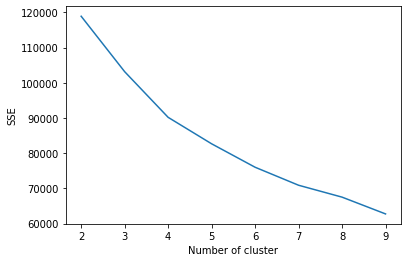

In [ ]:
from sklearn.cluster import KMeans

sse = {}
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(df_clean_scaled)
    sse[k] = kmeans.inertia_ # Inertia: Soma das distâncias das amostras até o centro do cluster mais próximo
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

O que fizemos aqui foi rodar o KMeans diversas vezes, para vários números diferentes de clusters (Nesse caso foi de 2 a 10), e dizer qual dessas quantidades foi o número ótimo de clusters.

O que geralmente acontece ao aumentar a quantidade de clusters no KMeans é que as diferenças entre clusters se tornam muito pequenas, e as diferenças das observações intra-clusters vão aumentando. Então é preciso achar um equilíbrio em que as observações que formam cada agrupamento sejam o mais homogêneas possíveis e que os agrupamentos formados sejam o mais diferentes um dos outros.

Mas como saber qual é esse ponto onde atingimos o número ótimo de clusters, de acordo com esse gráfico acima, por exemplo?

Vamos utilizar uma outra métrica de desempenho para nos ajudar nessa tarefa!

##  Outros critérios de validação

Conforme sabemos, um modelo de machine learning deve ser quantificável, seja em termos de desempenho ou precisão.

Avaliar o desempenho de um algoritmo de agrupamento não é tão trivial quanto contar o número de erros ou a precisão e recuperação de um algoritmo de classificação supervisionado. Em particular, qualquer métrica de avaliação não deve levar em consideração os valores absolutos dos rótulos do cluster, mas sim se esse cluster definir separações dos dados analisados. Essas separações devem satisfazer a algum conjunto de classes verdadeiras ou alguma suposição de modo que os membros pertençam à mesma classe de acordo com alguma métrica de similaridade.

No caso de modelos de clusterização, podemos testar o desempenho do modelo utilizando as seguintes métricas:

* Coeficiente de silhueta;
* Pontuação do davies bouldin;
* Pontuação do Calinski;

**Neste trabalho irei trabalhar apenas com o coeficiente de silhueta (além do método do cotovelo) para verificar o desempenho do nosso cluster.**

### Coeficiente de silhueta

O Coeficiente silhueta é calculado usando a distância média dentro do cluster (a) e a distância média do cluster mais próximo (b) para cada amostra.

Para esclarecer, é a distância entre uma amostra e o cluster mais próximo do qual a amostra não faz parte. 

Matematicamente, o coeficiente de silhueta é definido da seguinte forma:

$$
s = \frac{b - a}{max(a,b)}
$$

O melhor valor é 1 e o pior valor é -1. Valores próximos a 0 indicam clusters sobrepostos. Valores negativos geralmente indicam que uma amostra foi atribuída ao cluster errado, pois um cluster diferente é "mais semelhante".



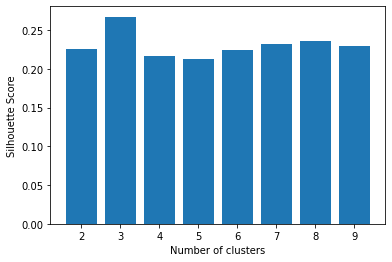

In [ ]:
from sklearn import metrics
from sklearn.metrics import silhouette_score

# Avaliando o modelo pelo coeficiente de silhueta
silhouette_scores = [] 

for n_cluster in range(2, 10):
    silhouette_scores.append( 
      silhouette_score(df_clean_scaled, KMeans(n_clusters = n_cluster).fit_predict(df_clean_scaled))) 
    
# Plotando um gráfico para comparar os resultados 
k = [2, 3, 4, 5, 6, 7, 8, 9] 
plt.bar(k, silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 10) 
plt.ylabel('Silhouette Score', fontsize = 10) 
plt.show() 

O melhor valor para o número de clusters foi 3. Apesar do valor do coeficiente de silhueta ter dado positivo (por volta de 0,25), ainda está um pouco distante do máximo ideal que seria 1,0. Podemos considerar esse valor bom, pois, foi apenas nosso primeiro teste utilizando o KMeans + standard scaler. 

Em projetos de machine learning tanto supervisionado quanto não supervisionado, devemos sempre fazer diversos testes com vários modelos de machine learning, vários modelos de pré-processamento e vários hyperparâmetros diferentes. É testando e avaliando que conseguimos melhorar nossos resultados.

##  Bônus - Teste do KMeans com outros métodos de pré-processamento

Conforme falado no tópico anterior, é sempre muito recomendado que se teste os modelos de machine learning de diversas formas diferentes. Vamos testar o KMeans com outras formas de pré-processamento dos dados para conseguir alcançar desempenhos melhores. 

Já fizemos o algoritmo com a padronização pelo standard scaler. Vou fazer mais três testes, um utilizando o normalizer e outro utilizando o PCA, que um algoritmo de redução de dimensionalidade das variáveis.

Vamos lá !

### Teste 1 - KMeans + Normalizer

In [ ]:
from sklearn.preprocessing import Normalizer

df_clean_normalized = Normalizer().fit_transform(df_clean)
print(df_clean_normalized)

[[3.93555441e-02 7.87271593e-04 9.17958473e-02 ... 1.94178127e-01
  1.34239194e-01 0.00000000e+00]
 [2.93875903e-01 8.34231560e-05 0.00000000e+00 ... 3.76516684e-01
  9.84037959e-02 2.03923046e-05]
 [3.10798149e-01 1.24560965e-04 9.63068011e-02 ... 7.74852335e-02
  7.81351982e-02 0.00000000e+00]
 ...
 [2.27733092e-02 8.11060955e-04 1.40540698e-01 ... 7.90986945e-02
  8.02156174e-02 2.43318384e-04]
 [2.65257948e-02 1.64255731e-03 0.00000000e+00 ... 1.03579625e-01
  1.09898221e-01 4.92767391e-04]
 [1.86406219e-01 3.33426837e-04 5.46778061e-01 ... 3.15915455e-02
  4.41568390e-02 0.00000000e+00]]


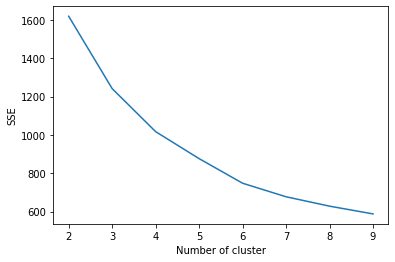

In [ ]:
sse = {}
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(df_clean_normalized)
    sse[k] = kmeans.inertia_ # Inertia: Soma das distâncias das amostras até o centro do cluster mais próximo
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

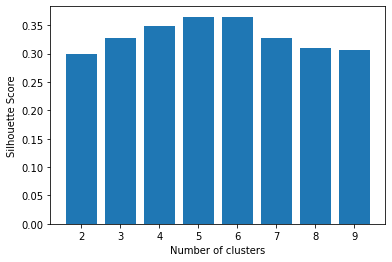

In [ ]:
# Avaliando o modelo pelo coeficiente de silhueta
silhouette_scores = [] 

for n_cluster in range(2, 10):
    silhouette_scores.append( 
      silhouette_score(df_clean_normalized, KMeans(n_clusters = n_cluster).fit_predict(df_clean_normalized))) 
    
# Plotando um gráfico para comparar os resultados 
k = [2, 3, 4, 5, 6, 7, 8, 9] 
plt.bar(k, silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 10) 
plt.ylabel('Silhouette Score', fontsize = 10) 
plt.show() 

Note como o teste de várias hipóteses é muito importante. Conseguimos aumentar significativamente o nosso coeficiente de silhueta, agora ele está em aproximadamente 0,35.

Vamos para mais um teste!

### Teste 2 - KMeans + PCA + StandardScaler

O PCA tem que ser utilizado combinado com um algoritmo de padronização/normalização dos dados. Aqui vamos testar utilizando os dois que já havíamos trabalhado.

In [ ]:
from sklearn.decomposition import PCA

# Reduzindo as dimensões dos dados 
pca = PCA(n_components = 2) 
df_clean_pca1 = pca.fit_transform(df_clean_scaled) 
df_clean_pca1 = pd.DataFrame(df_clean_pca1) 
df_clean_pca1.columns = ['P1', 'P2'] 
  
df_clean_pca1.head()

,P1,P2
0,-1.720363,-1.068785
1,-1.165128,2.511938
2,0.938101,-0.382674
3,-0.921951,0.007290
4,-1.638459,-0.680247


Redução das variáveis após a aplicação do PCA.

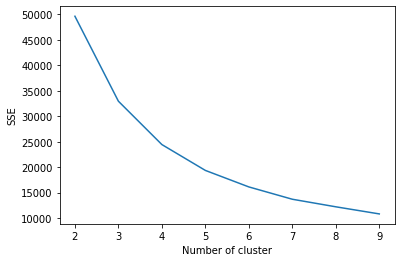

In [ ]:
sse = {}
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(df_clean_pca1)
    sse[k] = kmeans.inertia_ # Inertia: Soma das distâncias das amostras até o centro do cluster mais próximo
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

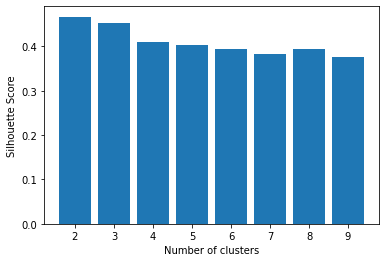

[0.4668137870595848, 0.4531356717348491, 0.4093352270218348, 0.403710526481438, 0.3941118890045636, 0.3819380583897981, 0.3942955223483481, 0.37639142808276504]


In [ ]:
# Avaliando o modelo pelo coeficiente de silhueta
silhouette_scores = [] 

for n_cluster in range(2, 10):
    silhouette_scores.append( 
      silhouette_score(df_clean_pca1, KMeans(n_clusters = n_cluster).fit_predict(df_clean_pca1))) 
    
# Plotando um gráfico para comparar os resultados 
k = [2, 3, 4, 5, 6, 7, 8, 9] 
plt.bar(k, silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 10) 
plt.ylabel('Silhouette Score', fontsize = 10) 
plt.show() 
print(silhouette_scores)

Conseguimos mais uma vez superar o último teste. Agora o coeficiente de silhueta está em quase 0,5.

Vamos para nosso último teste!

### Teste 3 - KMeans + PCA + Normalizer

In [ ]:
# Reduzindo as dimensões dos dados 
pca = PCA(n_components = 2) 
df_clean_pca2 = pca.fit_transform(df_clean_normalized) 
df_clean_pca2 = pd.DataFrame(df_clean_pca2) 
df_clean_pca2.columns = ['P1', 'P2'] 
  
df_clean_pca2.head()

,P1,P2
0,-0.315292,-0.041621
1,0.318365,-0.161004
2,-0.207151,-0.180748
3,-0.291842,-0.113087
4,0.142324,-0.090895


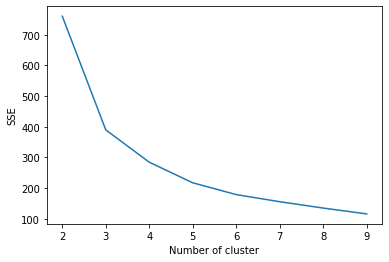

In [ ]:
sse = {}
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(df_clean_pca2)
    sse[k] = kmeans.inertia_ # Inertia: Soma das distâncias das amostras até o centro do cluster mais próximo
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

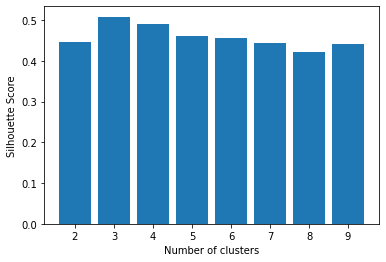

[0.44552830843047303, 0.5081709881069851, 0.48921118159019544, 0.4612621320864556, 0.4551635969568813, 0.44449916897476194, 0.42099848531542416, 0.4415982816697102]


In [ ]:
# Avaliando o modelo pelo coeficiente de silhueta
silhouette_scores = [] 

for n_cluster in range(2, 10):
    silhouette_scores.append( 
      silhouette_score(df_clean_pca2, KMeans(n_clusters = n_cluster).fit_predict(df_clean_pca2))) 
    
# Plotando um gráfico para comparar os resultados 
k = [2, 3, 4, 5, 6, 7, 8, 9] 
plt.bar(k, silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 10) 
plt.ylabel('Silhouette Score', fontsize = 10) 
plt.show() 
print(silhouette_scores)

Chegamos em um valor ótimo para os nossos testes com o número de clusters igual a 3 e o coeficiente de silhueta em quase 0,51.

Vamos utilizar este modelo (teste 3) para elaborar nosso modelo final e entender melhor o que foi feito.

## Modelo final

Com todos os testes que foram propostos para esse trabalho feitos, vamos instanciar, treinar e fazer previsões com o modelo final adotado e tirar conclusões que definam alguma estratégia para o problema em questão.

In [ ]:
kmeans = KMeans(n_clusters=3)
y_pred = kmeans.fit_predict(df_clean_pca2)

In [ ]:
y_pred = y_pred.reshape(len(y_pred), 1)
b = np.concatenate((y_pred, df_clean), axis=1)
df_final = pd.DataFrame(data=b, columns=['Cluster_Num','BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT'])
df_final.Cluster_Num.value_counts().sort_index()

0.0    1894
1.0    3560
2.0    3496
Name: Cluster_Num, dtype: int64

Essa é a contagem da quantidade de clientes em cada um dos três clusters.

In [ ]:
df_final.head()

,Cluster_Num,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT
0,1.0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0.0,2.0,1000.0,201.802084,139.509787,0.000000
1,2.0,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4.0,0.0,7000.0,4103.032597,1072.340217,0.222222
2,1.0,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0.0,12.0,7500.0,622.066742,627.284787,0.000000
3,1.0,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1.0,1.0,7500.0,0.000000,312.343947,0.000000
4,2.0,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0.0,1.0,1200.0,678.334763,244.791237,0.000000


Aqui, concatenamos os nossos clusters com o dataframe inicial para ter uma visualização dos clusters pertencentes as suas respectivas características. 

Essa é uma visualização muito interessante na nossa segmentação de clientes, pois, conseguimos ver cliente por cliente, em qual cluster ele pertence e quais características ele tem.

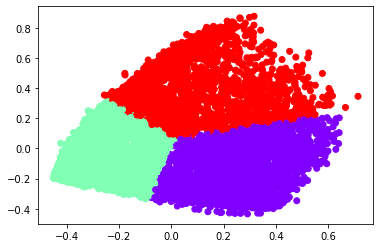

In [ ]:
# Visualizando o cluster 
plt.scatter(df_clean_pca2['P1'], df_clean_pca2['P2'],  
           c = KMeans(n_clusters = 3).fit_predict(df_clean_pca2), cmap =plt.cm.rainbow) 
plt.show() 

Aqui estão nossos clusters dispostos graficamente em função das nossas variáveis reduzidas com o algoritmo do PCA.

Vamos agora, fazer uma análise estatística dos nossos clusters, selecionando algumas variáveis. Nesse caso, vamos tentar selecionar as "melhores" variáveis, ou seja, as variáveis que vão melhor descrever o porque dessa segmentação, o porque cada cliente está em seu respectivo cluster.

Para fazer isso, vamos primeiro selecionar essas variáveis com base na variância entre elas. As variáveis que possuírem maior variância, serão as que vamos adotar para analisar estatisticamente os clusters.

In [ ]:
description = df_final.groupby("Cluster_Num")["BALANCE", "PURCHASES", "CASH_ADVANCE"]
n_clients = description.size()
description = print(description.mean())

                 BALANCE    PURCHASES  CASH_ADVANCE
Cluster_Num                                        
0.0          1148.777500  2723.049403    614.288509
1.0           582.160651   721.330781    155.140740
2.0          2789.980894   358.492594   2015.198223


In [ ]:
description = df_final.groupby("Cluster_Num")["PRC_FULL_PAYMENT", "CREDIT_LIMIT", "PAYMENTS"]
n_clients = description.size()
description = print(description.mean())

             PRC_FULL_PAYMENT  CREDIT_LIMIT     PAYMENTS
Cluster_Num                                             
0.0                  0.256802   3762.269234  3696.445865
1.0                  0.235724   5226.358330   848.337269
2.0                  0.014355   4145.381735  1570.505815


Selecionamos então, 6 variáveis para fazer essa análise. Lembrando que essa análise pode se estender para todas as variáveis, porém, escolhi as 6 que possuem uma maior variância e/ou fazem mais sentido nesse momento.

Os valores apresentados, são uma média dos valores das respectivas variáveis, em cada cluster, por exemplo, os clientes do cluster 1, em média, possuem um limite de crédito de U$ 5226.35.

Esse é o momento de deduzir conclusões mais aprofundadas. Essas deduções são subjetivas e irão depender muito do objetivo da empresa, mas vamos aqui fazer algumas análises que possam ser de grande valor:

**Cluster 0**: Clientes com limite de crédito baixo; Fazem compras com grandes valores;  Pagam em dia.

**Cluster 1**: Clientes com limite de crédito alto; Fazem compras com pequenos valores; Pagam em dia.

**Cluster 2**: Clientes com limite de crédito médio; Fazem compras com pequenos valores; Não pagam em dia.

**Com essas deduções baseadas nos clusters, podemos pensar em estratégias como:**

* Já que os clientes do **cluster 0** fazem compras com grandes valores e pagam em dia, não seria interessante aumentar o limite de crédito desses clientes para que eles possam gastar mais e gerar mais lucro para a empresa?

* Já que os clientes do **cluster 1** possuem um alto limite de crédito, porém fazem compras com pequenos valores, não seria interessante, por exemplo, fazer uma parceria com alguma empresa que fornece pontos por gastos em cartões de crédito para fazer com que esses clientes gastem mais?

* Já que os clientes do **cluster 2** não pagam em dia e possuem um limite de crédito razoável, não seria interessante diminuir esse limite para que a empresa não sofra com prejuízos maiores?

Enfim, essas são algumas das deduções que conseguimos fazer, mas, como sabemos, tudo isso é bem subjetivo e depende do que a empresa quer no momento e se a estratégia x, y ou z faz sentido nesse momento. Não necessariamente existe um certo ou errado nessas análises, isso depende do objetivo final.




## Conclusão

Ao longo deste projeto vimos uma série de trabalhos que tanto a empresa quanto o cientista de dados tem que fazer. Resumidamente foram:

* Estudo do problema para fazer uma clusterização;

* Aquisição dos dados;

* Análise exploratória dos dados;

* Preparação e limpeza dos dados;

* Modelo base de machine learning;

* Testes de hipóteses modificando diversas variáveis no modelo de machine learning;

* Escolha do modelo final;

* Conclusão do objetivo e definição do plano de ação.

Este projeto é uma pequena amostra do que podemos fazer com uma clusterização, claro que aqui nos limitamos apenas a algumas análises. Fica então, um convite para em uma outra oportunidade explorarmos outras abordagens e outros problemas nesse vasto mundo da clusterização e do aprendizado não supervisionado.

Espero ter ajudado !

Obrigado !